# Diwali Sales Analysis

In [132]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
# importing dataset
df = pd.read_csv('Diwali Sales Dataset.csv',encoding = 'unicode_escape') # to avoid encoding error, use 'unicode_escspe'
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

In [134]:
df.shape

(11251, 15)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [136]:
# drop blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [138]:
# checking null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [139]:
# drop null values
df.dropna(inplace=True)

In [140]:
# change data types
df['Amount']=df['Amount'].astype('int32')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [142]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [143]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratorey Data Analysis

In [144]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### Gender

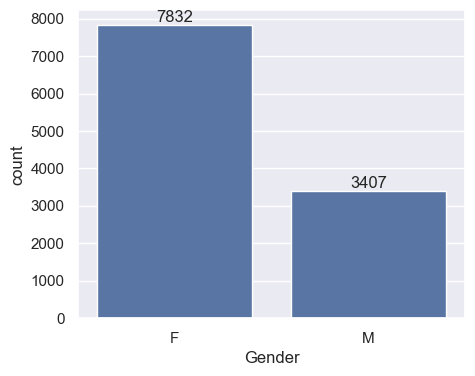

In [145]:
sns.set(rc={'figure.figsize':(5,4)})
ax = sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

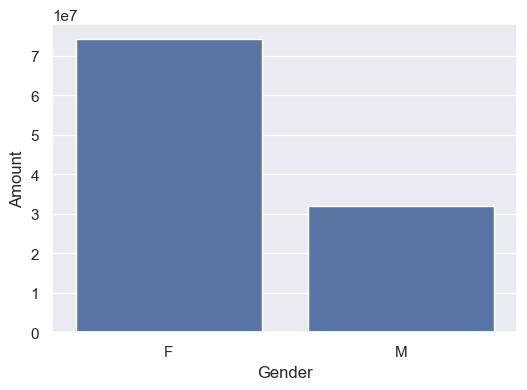

In [146]:
Gendersales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(x='Gender',y='Amount',data=sales_gen)

##### Note : The graph above shows that women represent the majority of buyers and that their purchasing power is much higher than that of men.

#### Age

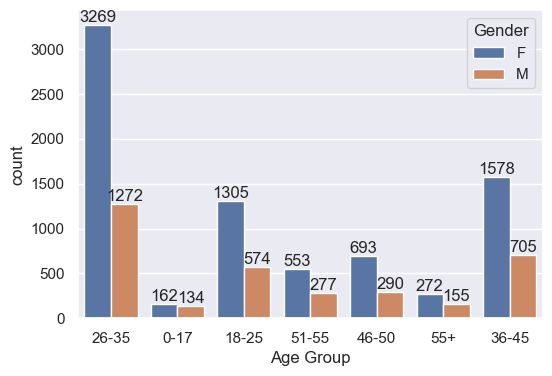

In [147]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

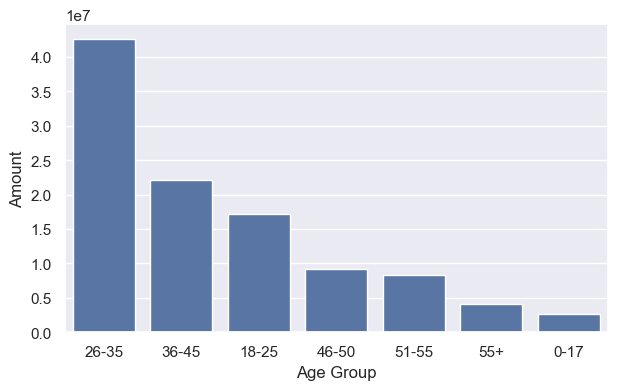

In [148]:
# total amount vs age group

sales_age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
sns.set(rc={'figure.figsize':(7,4)})
sns.barplot(x='Age Group',y='Amount',data=sales_age)

##### Note : The graph above indicates that the majority of customers are female between the ages of 26 to 35.

#### State

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

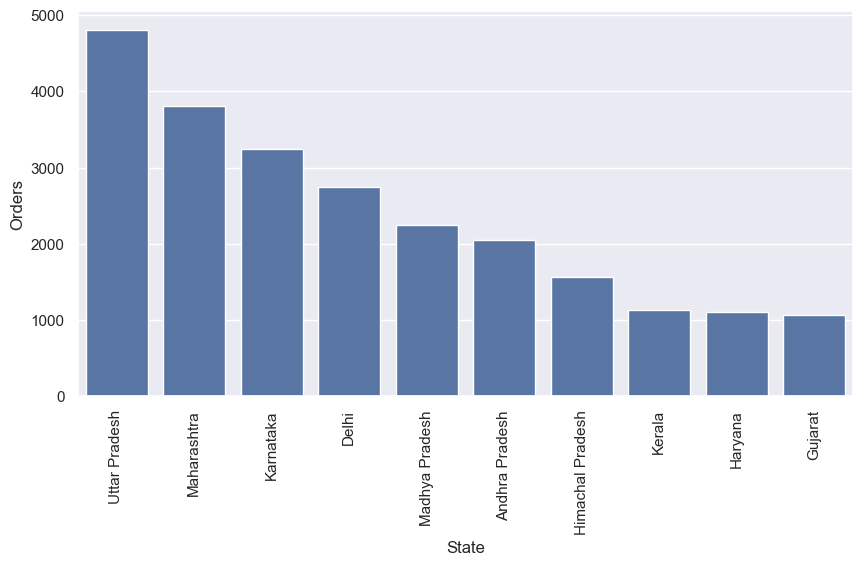

In [149]:
sales_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='State',y='Orders',data=sales_state)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

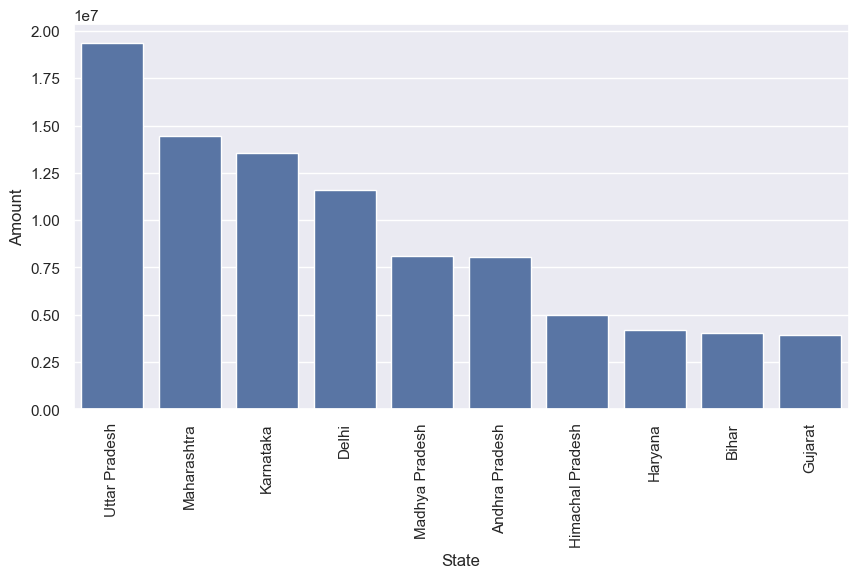

In [150]:
# total amount/sales from top 10 sales
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='State',y='Amount',data=sales_state)
plt.xticks(rotation='vertical')


##### Note : The graph above shows that the majority of orders and total sales/amount originate from Uttar Pradesh, Maharashtra, and Kerala, in that order.

#### Marital Status

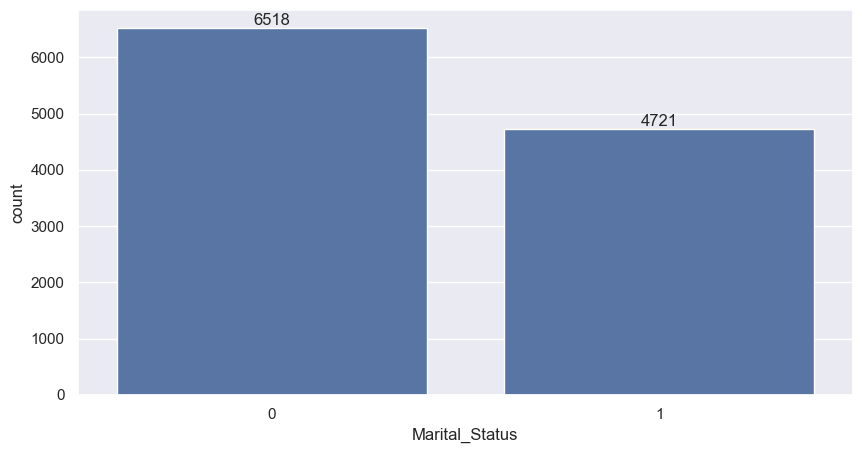

In [151]:
ax = sns.countplot(x='Marital_Status',data=df)

sns.set(rc={'figure.figsize':(4,3)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

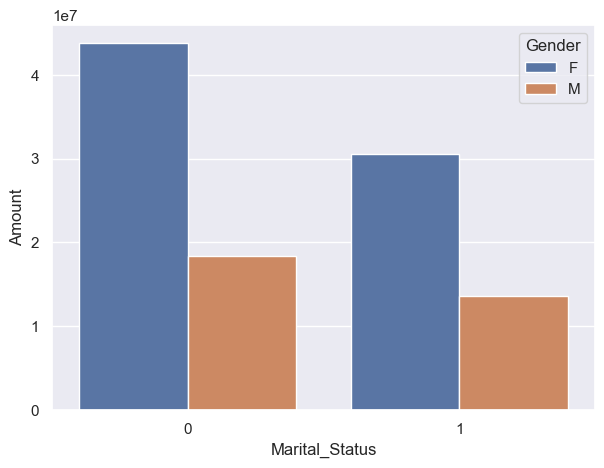

In [152]:
sales_state= df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Marital_Status',y='Amount',data=sales_state,hue='Gender')



##### Note : The graph above indicates that married women contribute to the majority of customers, and they have significant spending power.

#### Occupation

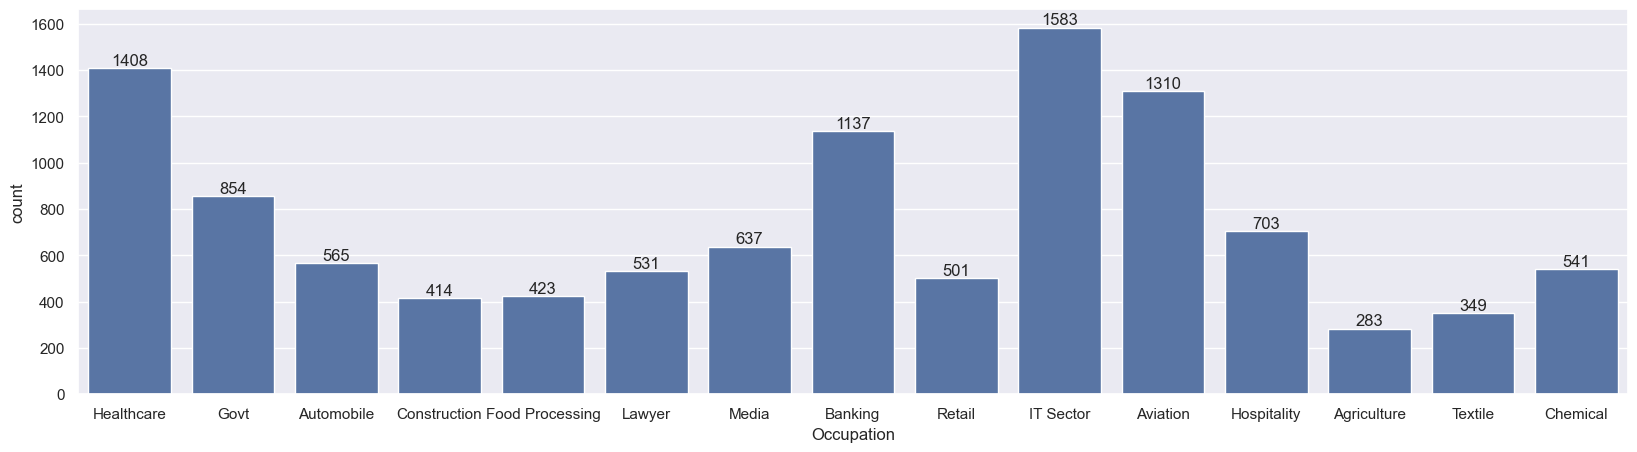

In [153]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

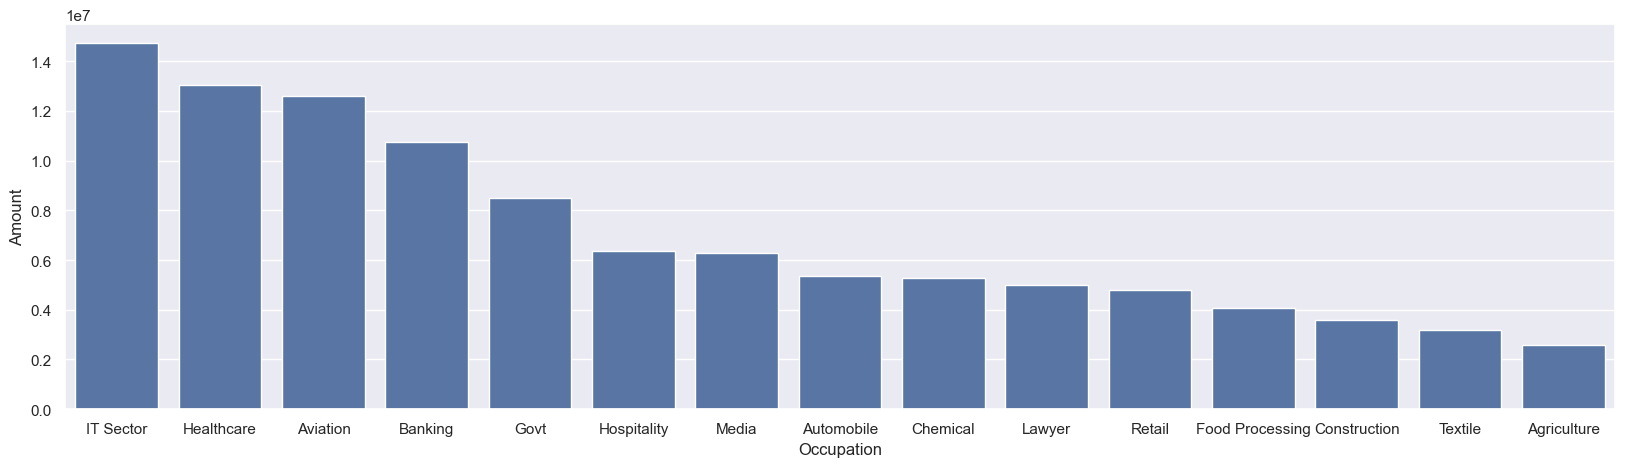

In [154]:
sales_state = df.groupby(['Occupation'],as_index =False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state,x='Occupation',y='Amount')



##### Note : From above graph we can see that most of the buyers are working in IT, Heathcare and Aviation sector.

#### Product Catogary

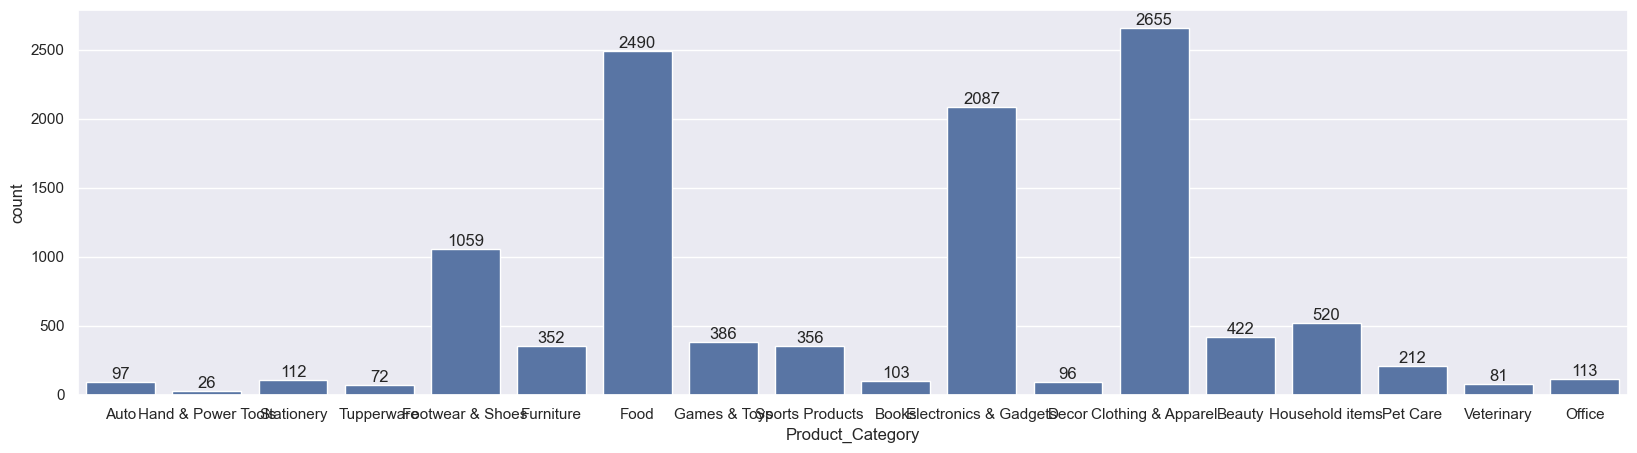

In [155]:
ax = sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

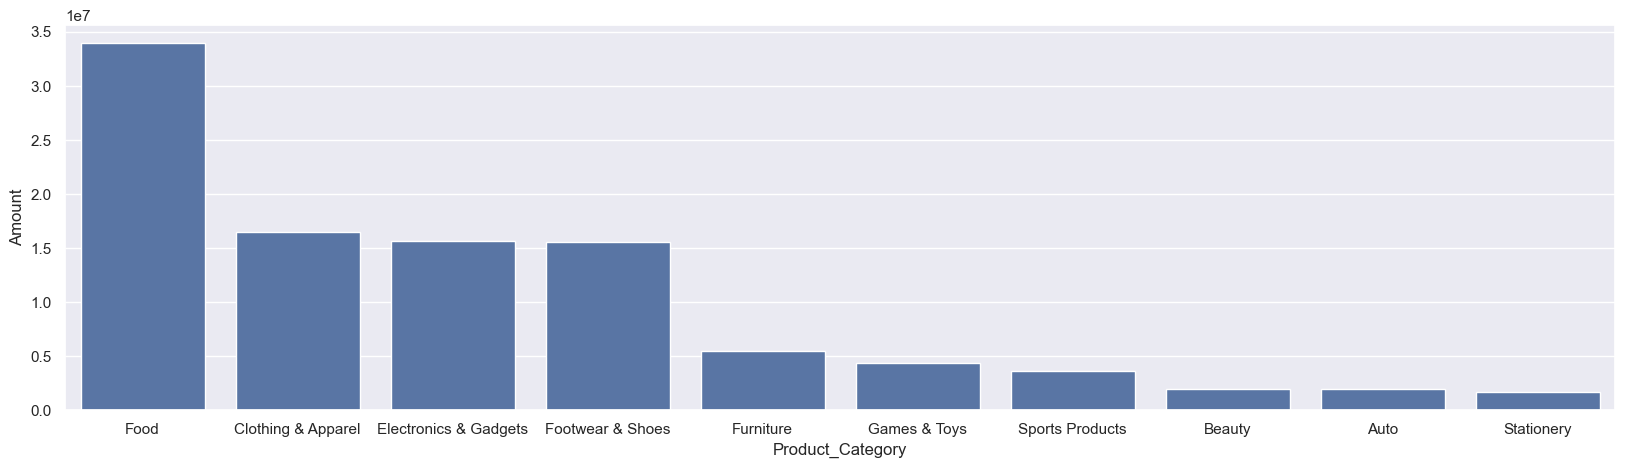

In [156]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state,x='Product_Category',y='Amount')



##### Note : From above graph we can see that most of the sold products are from Food, Clothing and Electronic Category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

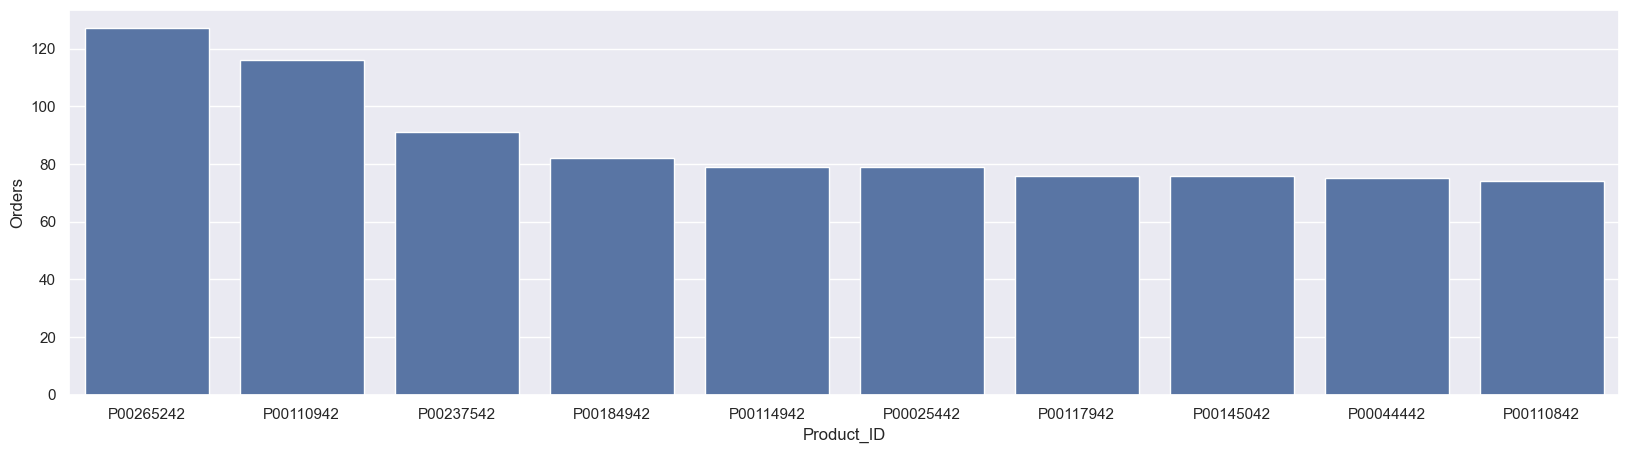

In [157]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

### Conclusion : 

##### Married women from Uttar Pradesh, Maharashtra, and Karnataka in the age range of 26 to 35 years who work in IT, Healthcare, and Aviation are more likely to purchase goods in the Food, Clothing, and Electronics categories.